In [5]:
# Instalación de librerias 

#%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

In [6]:
class TimeSerie:

    amount_bins = 0
    period = 0
    num_periods = 0
    array_periods = []
    tensor_data = []

    # contructor
    def __init__(self,interval,amount_data):
        self.interval = interval
        self.amount_data = amount_data

        self.set_data()
        self.normalize()

    # set time and magnitud data for time serie
    def set_data(self):
        self.time = self.interval * np.sort(np.random.rand(self.amount_data))
        self.magnitud = np.random.randn(self.amount_data)

    # process to normalize time data in range 0 to 1
    def normalize(self):
        aux_time = self.time
        self.time =  (aux_time- aux_time.min())/(aux_time.max()-aux_time.min())

    # x axis
    def get_time(self):
        return self.time

    # y axis
    def get_magnitud(self):
        return self.magnitud

    # method for get tensor (mean,max,min,std for different periods)
    def get_tensor(self):
        return self.tensor_data

    def get_configuration_data(self):
        all_info = f'interval: {self.interval}\namount_data: {self.amount_data}\namount_bins: {self.amount_bins}\nperiod: {self.period}\nnum_periods: {self.num_periods}\narray_periods: {self.array_periods}\n'
        print(all_info)

    def set_params_data(self,amount_bins,period,num_periods):
        self.amount_bins = amount_bins
        self.period = period
        self.num_periods = num_periods

    def set_array_periods(self,array_periods):
        self.array_periods = array_periods

    def set_tensor(self,tensor):
        self.tensor_data = tensor

    # method for get time serie graphic
    def view_time_serie(self,rows=6,cols=16,font_size=18):
        title_figure = f'Time serie'
        plt.figure(figsize=(cols,rows))
        plt.plot(self.time,self.magnitud)
        plt.scatter(self.time,self.magnitud)
        plt.ylabel("Magnitud")
        plt.xlabel("Time")
        plt.suptitle(title_figure,fontsize=font_size)
        plt.grid(axis = 'y', color = 'gray', linestyle = 'dashed')
        plt.grid(axis = 'x', color = 'gray', linestyle = 'dashed')
        plt.show()




interval: 20
amount_data: 100
amount_bins: 0
period: 0
num_periods: 0
array_periods: []



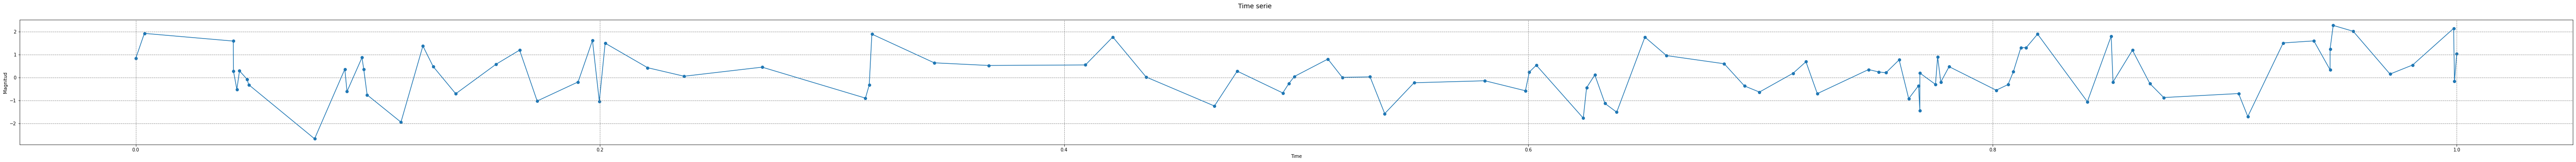

In [7]:
# Configuracion de parametros globales
amount_bins = 10
period = 1
num_periods = 3

time_serie = TimeSerie(20,100)

# time_serie.set_data()
# time_serie.normalize()

time_serie.get_configuration_data()
# print(time_serie.get_time())
time_serie.view_time_serie(5,100,14)
time_serie.set_params_data(amount_bins,period,num_periods)


#Creacion de un array que contiene los T/n periodos distintos
def generate_periods(num_periods=1):
    all_period = [1]
    
    for i in range(1, num_periods):
        all_period.append(2**i)
    
    return all_period

array_periods = generate_periods(num_periods)
# print(array_periods)
time_serie.set_array_periods(array_periods)


In [8]:
#Creacion del grafico aplicando el metodo de folding
def drawGraphic(bins,time,mag,indice,period):
    title_figure = f'Folded Time Serie with period T/{period}'
    #Grafico para ver la serie de tiempo 
    plt.figure(figsize=(12,4))
    plt.plot(time[indice], mag[indice])
    plt.scatter(time[indice], mag[indice])
    plt.ylabel("Magnitud")
    plt.xlabel("Time")
    plt.suptitle(title_figure, fontsize=22)
    plt.grid(axis='x', color='red', linestyle='-', linewidth=2)
    
    for bin in bins:
        plt.axvline(x=bin,color='red')

    # plt.grid(axis='y', color='gray', linestyle='dashed')
    plt.show()


def getStatistic(index,indBin,magnitud):
    mag_ordered = magnitud[index]
    #print("magOrdered: ", magOrdered)

    # concentration = np.array(concentration)
    vector_mean = np.array([np.nanmean(mag_ordered[indBin==(i+1)])  if (indBin==(i+1)).sum()>0 else -1000  for i in range(amount_bins)])
    vector_max = np.array([np.nanmax(mag_ordered[indBin==(i+1)])  if (indBin==(i+1)).sum()>0 else -1000 for i in range(amount_bins)])
    vector_min = np.array([np.nanmin(mag_ordered[indBin==(i+1)])  if (indBin==(i+1)).sum()>0 else -1000 for i in range(amount_bins)])
    vector_std = np.array([np.nanstd(mag_ordered[indBin==(i+1)])  if (indBin==(i+1)).sum()>0 else -1000 for i in range(amount_bins)])

    # print("concentration:", concentration)
    # print("mean:",vector_mean)
    # print("max:",vector_max)
    # print("min:",vector_min)
    # print("std:",vector_std)
    return [vector_mean,vector_max,vector_min,vector_std]


def variantion_period(array_periods,time_serie,format):
    
    tensor_data = []
    mean = []
    max = []
    min = []
    std = []

    for index, period in enumerate(array_periods):
        # print(periods)
        print(f'Periodo T/{period}')

        #valor del periodo en decimales
        period_float = 1 / period

        #proceso de folding
        folded_time = time_serie.get_time() % period_float
        #indices de los datos para encontrarlos luego del folding
        index_folded = np.argsort(folded_time)

        #Divido el periodo en bins o intervalos [0,n] para luego obtener datos estadisticos de cada bin
        bins = np.linspace(0,period_float,amount_bins+1)

        #Concentración de datos en cada bin
        concentration, bin_edges= np.histogram(folded_time[index_folded],bins=bins)
        #indices - Devuelve los índices de los bins a los que pertenece cada valor del folded_time
        index_bin = np.digitize(folded_time[index_folded],bins=bins)

        # print("bins: ",bins)
        # print("concentracion de datos en cada bin: ",concentration)
        # print("indice de cada bin: ",index_bin)

        drawGraphic(bins,folded_time,time_serie.get_magnitud(),index_folded,period)
        #primer piso de la matriz que contendrá las caracteristicas en distintos periodos

        # if format == 'MATRIZ_PERIODS':

        vectorStatisticPeriod = np.asmatrix(getStatistic(index_folded,index_bin,time_serie.get_magnitud()))
        tensor_data.append(vectorStatisticPeriod)

        # if format == 'MATRIZ_STATISTICS':
        #     vector_mean,vector_max,vector_min,vector_std = np.asmatrix(getStatistic(index_folded,index_bin,time_serie.get_magnitud()))
            
        #     mean.append(vector_mean)
        #     max.append(vector_max)
        #     min.append(vector_min)
        #     std.append(vector_std)
            
        # vector_mean, vector_max, vector_min, vector_std = np.asmatrix(getStatistic(index_folded,index_bin,time_serie.get_magnitud()))
        # mean.append(vector_mean)
        # max.append(vector_max)
        # min.append(vector_min)
        # std.append(vector_std)
        # concentration = np.array()
        # vectorStatisticPeriod.append(concentration)

        # tensor_data.append(np.array(concentration))
        # print(vectorStatisticPeriod)

        # print(tensor_data)

        print('-'*100)
    
    
    
    # mean = np.array(mean)
    # max = np.array(max)
    # min = np.array(min)
    # std = np.array(std)
    
    # print(mean)
    
    return tensor_data
     

Periodo T/1


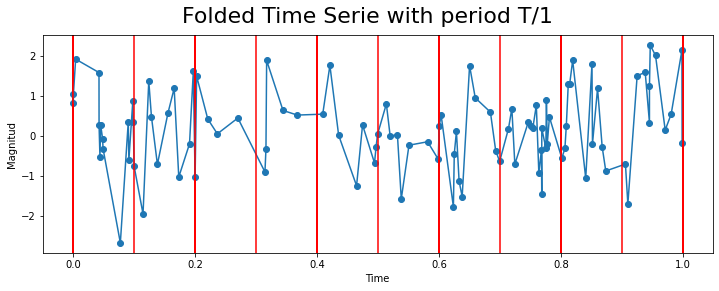

----------------------------------------------------------------------------------------------------
Periodo T/2


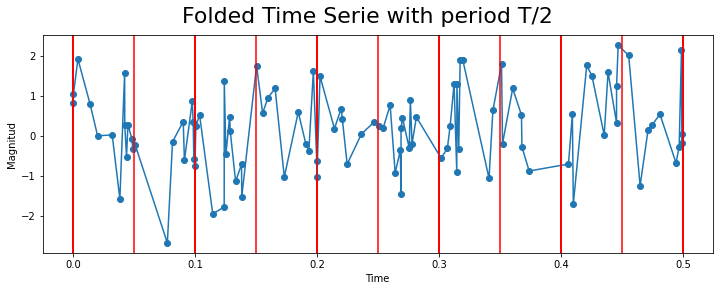

----------------------------------------------------------------------------------------------------
Periodo T/4


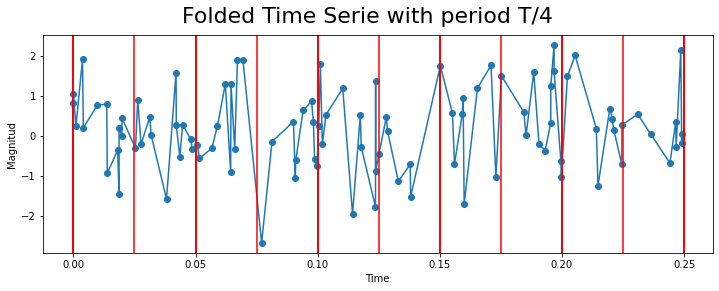

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Forma del tensor:
 
                matriz 1: T [ [mean],[max],[min],[std]]
                matriz 2: T/2 [ [mean],[max],[min],[std]]
                matriz 3: T/4 [ [mean],[max],[min],[std]]
                matriz 1: T/8 [ [mean],[max],[min],[std]]
                
                
TENSOR
[[[ 1.66483001e-01  2.68850928e-02  6.01142689e-01  3.60299532e-01
    5.29313562e-02 -2.46841972e-01 -1.44342788e-01 -1.84429597e-04
    3.67978222e-01  7.63285753e-01]
  [ 1.91694969e+00  1.60898981e+00  1.49009552e+00  1.88558657e+00
    1.76035635e+00  7.97512619e-01  1.75525376e+00  8.94568735e-01
    1.88633102e+00  2.26474519e+00]
  [-2.67807119e+00 -1.95240791e+00  4.92026215e-02 -9.04593853e-01
   -1.24837804e+00 -1.58035233e+00 -1.77766958e+00 -1.44547195e+00
   -1.06112142e+00 -1.70691480e+0

In [9]:
MATRIZ_PERIOD = 'MATRIZ_PERIODS'
MATRIZ_STATISTICS = 'MATRIZ_STATISTICS'

tensor_output = np.array(variantion_period(array_periods,time_serie,MATRIZ_PERIOD))

time_serie.set_tensor(tensor_output)

print('-'*100)

print_tensor = f'''
                matriz 1: T [ [mean],[max],[min],[std]]
                matriz 2: T/2 [ [mean],[max],[min],[std]]
                matriz 3: T/4 [ [mean],[max],[min],[std]]
                matriz 1: T/8 [ [mean],[max],[min],[std]]
                
                '''

print('Forma del tensor:\n',print_tensor)

print('TENSOR')
print(time_serie.get_tensor())